Just animation needs to be done

In [1]:
%pylab qt
%matplotlib inline

from celestialbody.celestialbody import CelestialBody
import datetime
from matplotlib import animation
from matplotlib import rcParams

def mysavefig(name):
    plt.tight_layout()
    plt.savefig("../images/"+name, dpi=200)

Populating the interactive namespace from numpy and matplotlib


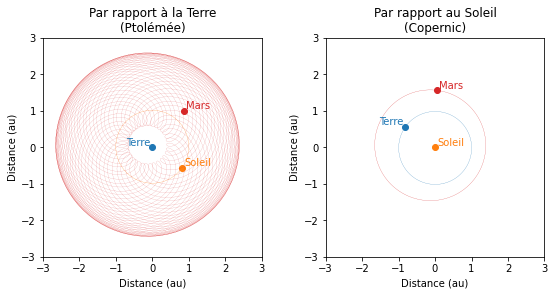

In [52]:
earth = CelestialBody("EM Bary")
mars  = CelestialBody("Mars")

start = datetime.datetime(2021,2,14)
stop  = start + (datetime.datetime(2100,1,2) - datetime.datetime(2021,1,1))
step_day = datetime.timedelta(days=7)

date = start
x0, x, X, y0, y, Y = [], [], [], [], [], []
while date < stop:
    earth.date = date
    mars.date  = date
    val_x0, val_y0, _ = earth.position
    val_x, val_y, _   = mars.position
    x0.append(val_x0), y0.append(val_y0)
    x.append(val_x), y.append(val_y)
    X.append(val_x-val_x0), Y.append(val_y-val_y0)
    date += step_day
x0, y0 = np.array(x0), np.array(y0)
x, y = np.array(x), np.array(y)
X, Y = np.array(X), np.array(Y)

plt.figure(figsize=(8,4))
sps = (1,2)
ax1 = plt.subplot2grid(sps, (0,0))
ax2 = plt.subplot2grid(sps, (0,1))
for ax in [ax1, ax2]:
    ax.set_xlim(-3,3)
    ax.set_ylim(-3,3)
    ax.set_xlabel("Distance (au)")
    ax.set_ylabel("Distance (au)")
    ax.set_aspect("equal")

# Geocentric
ax1.set_title("Par rapport à la Terre\n(Ptolémée)")

ax1.plot(-x0[0], -y0[0], "o", color="C1")
ax1.annotate("Soleil", (-x0[0], -y0[0]), color="C1", xytext=(2,2), textcoords="offset points", ha="left")
ax1.plot(-earth.orbit[0], -earth.orbit[1], "-C1", linewidth=.2)

ax1.plot([0],[0], "oC0")
ax1.annotate("Terre", (0,0), color="C0", xytext=(-2,2), textcoords="offset points", ha="right")

ax1.plot(X,Y, "-C3", linewidth=.1)
ax1.plot(X[0], Y[0], "oC3")
ax1.annotate("Mars", (X[0], Y[0]), color="C3", xytext=(2,2), textcoords="offset points", ha="left")

# Heliocentric
ax2.set_title("Par rapport au Soleil\n(Copernic)")
ax2.plot([0],[0], "oC1")
ax2.annotate("Soleil", (0,0), color="C1", xytext=(2,2), textcoords="offset points", ha="left")

ax2.plot(earth.orbit[0], earth.orbit[1], "-C0", linewidth=.2)
ax2.plot(x0[0], y0[0], "o", color="C0")
ax2.annotate("Terre", (x0[0], y0[0]), color="C0", xytext=(-2,2), textcoords="offset points", ha="right")

ax2.plot(mars.orbit[0], mars.orbit[1], "-C3", linewidth=.2)
ax2.plot(x[0], y[0], "o", color="C3")
ax2.annotate("Mars", (x[0], y[0]), color="C3", xytext=(2,2), textcoords="offset points", ha="left")

mysavefig("retrograde_motion.png")

# Mars around earth

In [30]:


# Setup figure

if referentiel == "geocentric":
    a_lim = 6
    title = "Mouvement de Mars \"autour\" de la Terre"
elif referentiel == "heliocentric":
    a_lim = 2
    title = "Mouvement de la Terre et de Mars autour du Soleil"

fig = plt.figure(figsize=(6,6))
sps = (1,1)
ax = plt.subplot2grid(sps, (0,0))
ax.set_aspect("equal")
ax.set_xlim(-a_lim,a_lim)
ax.set_ylim(-a_lim,a_lim)
ax.set_title(title)
ax.set_xlabel("x (au)")
ax.set_ylabel("y (au)")

if referentiel == "geocentric":
    ax.plot([0],[0], "o", color="C0")
    ax.annotate("Terre", (0,0), color="C0", xytext=(-2,2), textcoords="offset points", ha="right")
    trajectory_mars, = ax.plot([], [], "-C3", linewidth=.1) # trajectory
    planet_mars,     = ax.plot([], [], "oC3", label="Mars") # planet
    # Animation
    def init():
        trajectory_mars.set_data([], [])
        planet_mars.set_data([], [])
        return trajectory_mars,

    def animate(i):
        trajectory_mars.set_data(X[:i], Y[:i])
        planet_mars.set_data(X[i], Y[i])
        return trajectory_mars,
elif referentiel == "heliocentric":
    ax.plot([0],[0], "*", color="C1", markersize=20)
    ax.annotate("Sun", (0,0), color="C1", xytext=(-2,2), textcoords="offset points", ha="right")
    trajectory_earth, = ax.plot([], [], "-C0", linewidth=.1)
    planet_earth,     = ax.plot([], [], "oC0", label="Terre")
    trajectory_mars,  = ax.plot([], [], "-C3", linewidth=.1)
    planet_mars,      = ax.plot([], [], "oC3", label="Mars")
    def init():
        trajectory_earth.set_data([], [])
        planet_earth.set_data([], [])
        trajectory_mars.set_data([], [])
        planet_mars.set_data([], [])
        return trajectory_earth,

    def animate(i):
        trajectory_earth.set_data(x0[:i], y0[:i])
        planet_earth.set_data(x0[i], y0[i])
        trajectory_mars.set_data(x[:i], y[:i])
        planet_mars.set_data(x[i], y[i])
        return trajectory_earth,
plt.tight_layout()
plt.legend(loc="upper left")

anim = animation.FuncAnimation(fig, animate, frames=len(X)-1, interval=1e3/fps, init_func=init)

In [19]:
ax.annotate?

In [56]:
h = 1.25
d = 1.5
g = 10

T = np.sqrt(8*h/g)
v0z = g*T/2
v0x = d/T

v0x, v0z

(1.5, 5.0)

In [60]:
0.29/0.167

1.7365269461077841